In [1]:
import keras 
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten,Dropout,Activation
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers
from keras.datasets import cifar10
from keras.optimizers import SGD 

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print('Shape of training dataset :',x_train.shape)
print('Shape of testing dataste :' ,x_test.shape)

#formatting the dataset 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)


Using MXNet backend


Shape of training dataset : (50000, 3, 32, 32)
Shape of testing dataste : (10000, 3, 32, 32)


In [2]:
current_job_id = '001'
checkpoint_name = 'weights.{epoch:02d}-{val_loss:.2f}.hdf5'
filepath = 'saved_models/'
epochs_n = 100

In [4]:
rglrzr = None #regularizers.l2(0.0003)

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=[3,32,32],kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(512,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(1024,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(1024,(3,3),kernel_regularizer=rglrzr,padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip = False)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)



#add some callbacks:
callbacks = []

checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath+current_job_id+checkpoint_name, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

callbacks.append(checkpoint)
callbacks.append(reduce_lr)
callbacks.append(early_stopping)

Epoch 1/100


/home/shiqidai1002/anaconda3/lib/python3.7/site-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.0078125). Is this intended?
  force_init=force_init)


391/391 [==============================] - 27s 68ms/step - loss: 2.6656 - acc: 0.1593 - val_loss: 2.7349 - val_acc: 0.1774
Epoch 2/100
391/391 [==============================] - 21s 53ms/step - loss: 2.0895 - acc: 0.2393 - val_loss: 1.8901 - val_acc: 0.2819
Epoch 3/100
391/391 [==============================] - 21s 53ms/step - loss: 1.9997 - acc: 0.2816 - val_loss: 1.8355 - val_acc: 0.3146
Epoch 4/100
391/391 [==============================] - 21s 53ms/step - loss: 1.9412 - acc: 0.3149 - val_loss: 2.2937 - val_acc: 0.2368
Epoch 5/100
391/391 [==============================] - 21s 53ms/step - loss: 1.8387 - acc: 0.3512 - val_loss: 2.0583 - val_acc: 0.2761
Epoch 6/100
391/391 [==============================] - 20s 52ms/step - loss: 1.8366 - acc: 0.3656 - val_loss: 1.6788 - val_acc: 0.3572
Epoch 7/100
391/391 [==============================] - 20s 52ms/step - loss: 1.7157 - acc: 0.4063 - val_loss: 1.8049 - val_acc: 0.3738
Epoch 8/100
391/391 [==============================] - 21s 53ms/ste

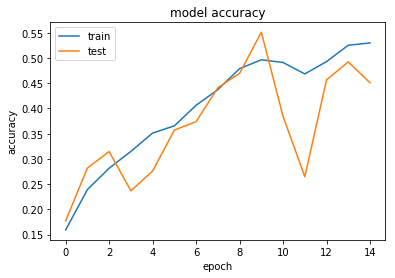

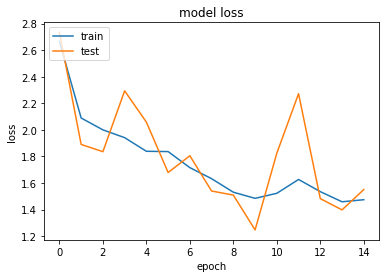

In [5]:
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128), 
                              epochs=epochs_n,
                              validation_data = (x_test,y_test),
                              callbacks = callbacks)
model.save(filepath + current_job_id)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

the accuracy was raising so slow